<a href="https://colab.research.google.com/github/hhaemin/computer_vision/blob/main/DEGENSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


다음 페이지 참고. 

https://github.com/ducha-aiki/pydegensac


현재 random consensus 계열의 여러 outlier rejection & model fitting 알고리즘에 비해 좋은 성능이라 알려져 있음. (2022/04)


In [2]:
!pip install pydegensac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 7.7 MB/s 


In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import pydegensac  ## pip install pydegensac

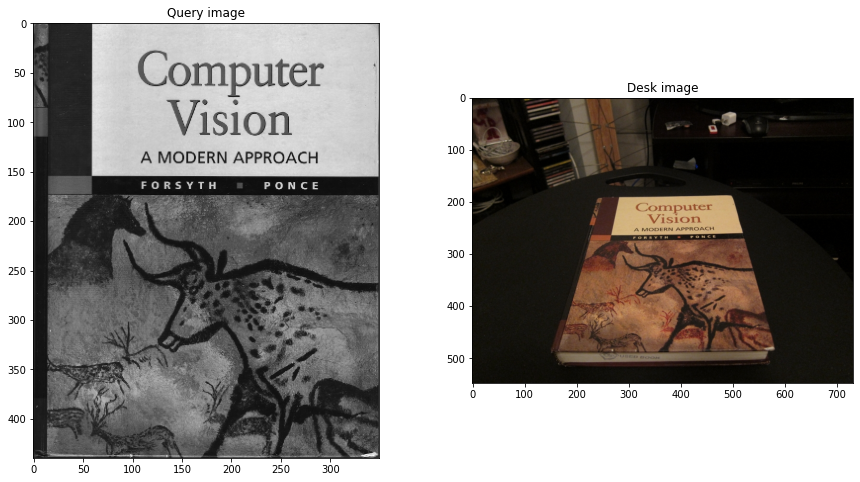

In [4]:
queryImage= 'cv_cover.jpg'
trainImage='cv_desk.png'


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(cv.imread(queryImage), cv.COLOR_BGR2RGB))
plt.title('Query image')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(cv.imread(trainImage), cv.COLOR_BGR2RGB))
plt.title('Desk image')
plt.show()

img1 = cv.imread(queryImage,cv.IMREAD_GRAYSCALE)         
img2 = cv.imread(trainImage,cv.IMREAD_GRAYSCALE) 

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt


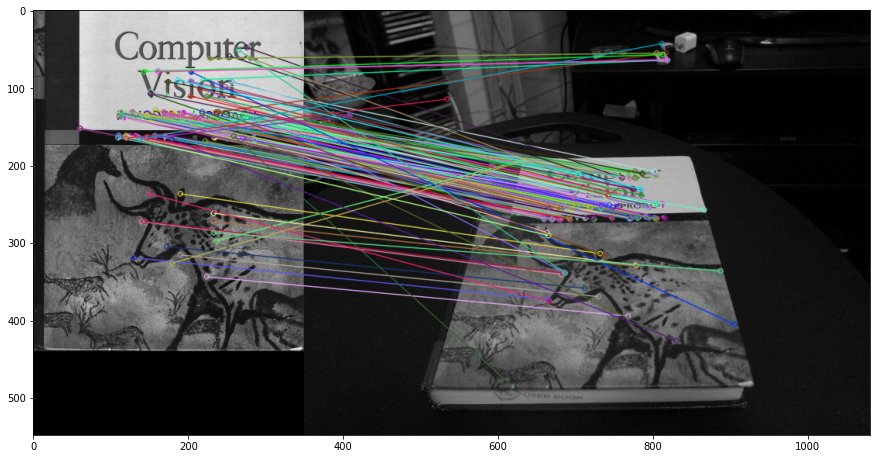

In [5]:
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()

[[-1.76031824e+00  8.99154525e-01 -5.64939360e+02]
 [ 2.60075415e-02 -4.52304090e-01 -4.60203801e+02]
 [-1.22379997e-05  2.43298595e-03 -2.36833598e+00]]
(144,) (144, 2) (144, 2)



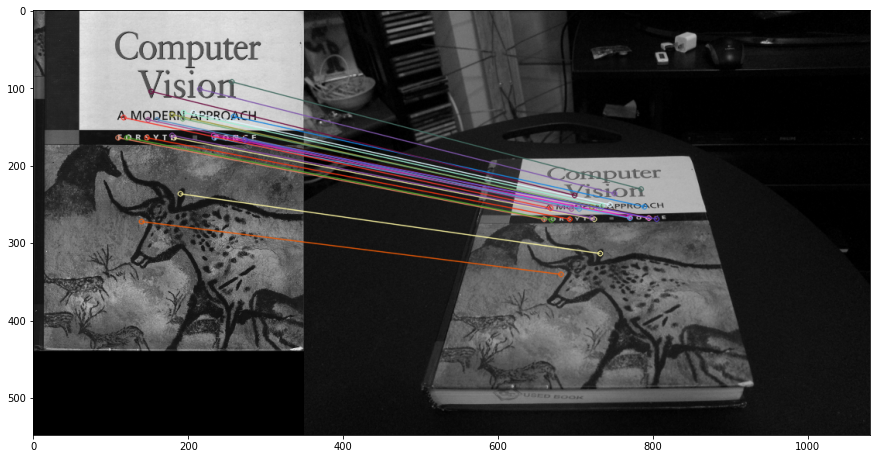

In [6]:
H, inliers = pydegensac.findHomography(np.array(points1), np.array(points2))

print(H)

print(inliers.shape, points1.shape, points2.shape)
print()
inlier_idx= np.nonzero(inliers.squeeze())
matches_degensac = np.array(matches)[inlier_idx]


img3 = cv.drawMatches(img1,kp1,img2,kp2,matches_degensac,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()